<a href="https://colab.research.google.com/github/17092003vamsi/HUNTERs/blob/main/tray_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found 761 images belonging to 4 classes.
Found 187 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 234s 10s/step - accuracy: 0.2424 - loss: 2.4910 - precision: 0.2373 - recall: 0.0699 - val_accuracy: 0.2620 - val_loss: 1.3813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.2822 - loss: 1.3785 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2995 - val_loss: 1.3842 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.2932 - loss: 1.3842 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2995 - val_loss: 1.3822 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.3003 - loss: 1.3829 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2995 - val_loss: 1.3801 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.3005 - loss: 1.3789 - precision: 0.0000e+00 - r

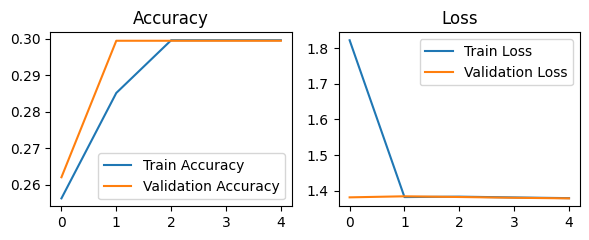

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


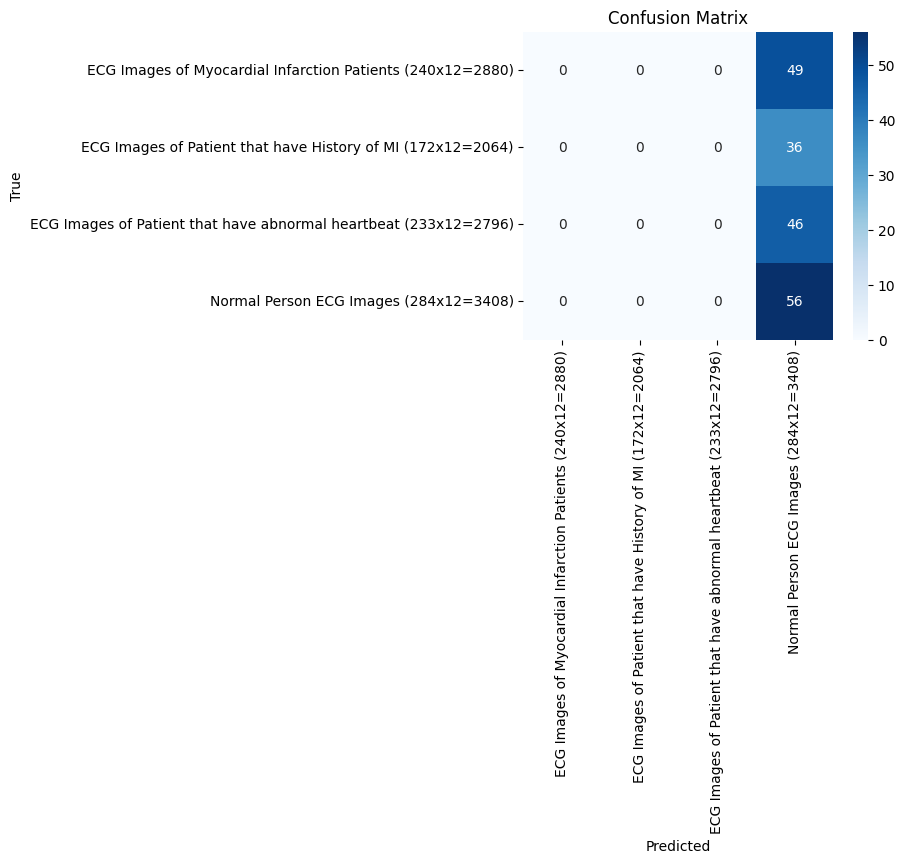


Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.00      0.00      0.00        49
     ECG Images of Patient that have History of MI (172x12=2064)       0.00      0.00      0.00        36
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.00      0.00      0.00        46
                          Normal Person ECG Images (284x12=3408)       0.30      1.00      0.46        56

                                                        accuracy                           0.30       187
                                                       macro avg       0.07      0.25      0.12       187
                                                    weighted avg       0.09      0.30      0.14       187



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


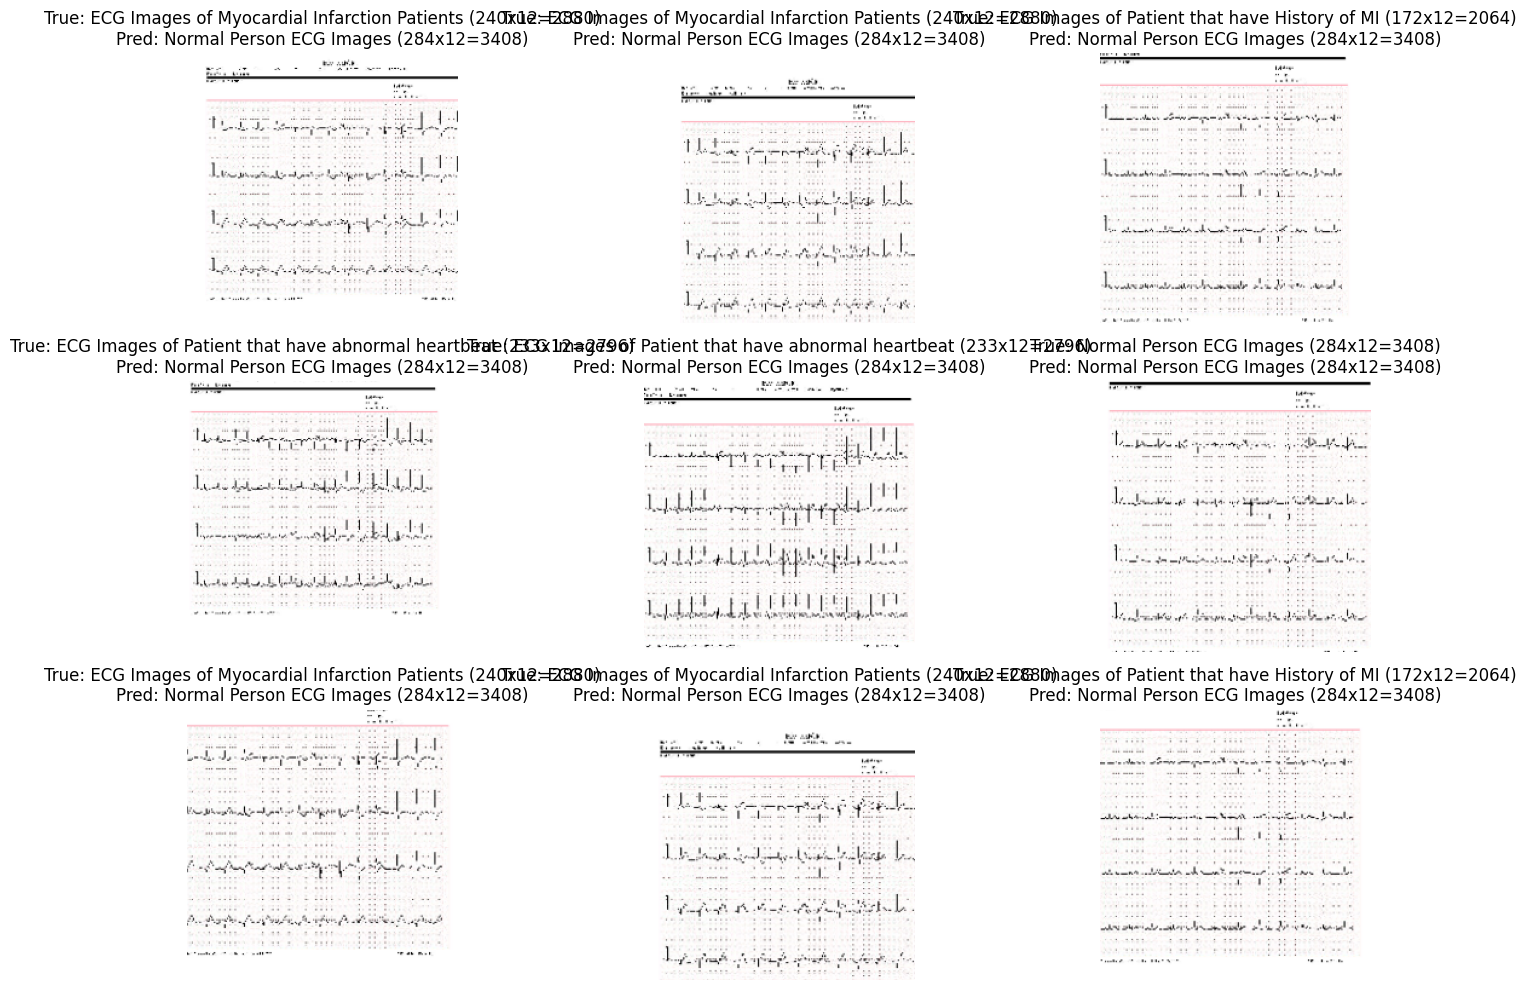

Model saved as 'ecg_classifier.h5'


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = '/content/drive/MyDrive/dataset of ecg project'

# ImageDataGenerator WITHOUT rotation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

# ==== Model 1: Custom CNN ====
def get_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    return model

# ==== Model 2: VGG16 Transfer Learning ====
def get_vgg16_model():
    base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    return model

# ==== Model 3: ResNet50 ====
def get_resnet50_model():
    base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    return model

# ==== Model 4: EfficientNetB0 ====
def get_efficientnet_model():
    base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    return model

# ==== Model 5 (Optional): Vision Transformer from Hugging Face ====
# from transformers import ViTFeatureExtractor, TFViTForImageClassification
# (Use Hugging Face Transformers if needed, can be added later)

# ==== Choose your model ====
model = get_custom_cnn()
# model = get_vgg16_model()
# model = get_resnet50_model()
# model = get_efficientnet_model()

# ==== Compile ====
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# ==== Train ====
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    verbose=1
)

# ==== Plot training history ====
plt.figure(figsize=(6, 2.5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ==== Confusion Matrix & Report ====
val_gen.reset()
y_pred = model.predict(val_gen, steps=len(val_gen))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# ==== Sample Predictions ====
plt.figure(figsize=(15, 10))
val_gen.reset()
for i in range(9):
    img, label = next(val_gen)
    pred = model.predict(img)
    true_class = class_names[np.argmax(label[0])]
    pred_class = class_names[np.argmax(pred[0])]
    plt.subplot(3, 3, i+1)
    plt.imshow(img[0])
    plt.title(f'True: {true_class}\nPred: {pred_class}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# ==== Save the Model ====
model.save('ecg_classifier.h5')
print("Model saved as 'ecg_classifier.h5'")
